# Authored by : Amirul Uzair

# Load Dependencies

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# Data Exploration

## Glimpse of Dataset

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [5]:
df.shape

(13200, 11)

In [6]:
df.info

<bound method DataFrame.info of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV

In [7]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [8]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Temperature': [ 14.  39.  30.  38.  27.  32.  -2.   3.  28.  35.  12. -10.  24.  10.
  33.  43.  13.  -7.  26.   4.  17.  40.   2.  15.  29.  11.  -9.  36.
  42.  21.  22.  25.  -4.  -1.  -5.  41.  31.  16.  34.  49.  19.  23.
  20.  -3.  18.   1.   0.  46.  44. -13.  -6.  78.  63.  73.   8. -12.
 -24.  -8.  60.  48.   5.  51. -14.  50.  37.  54.  47.  70.   9.  66.
 -16. -15.  59.  80. -19.  52.  45.   6. -18. -11.  74.  76.  55. -20.
  57.  91.  82. -17.  61.   7.  53.  65.  77.  67.  64.  58.  68.  72.
  62.  71.  56. 107. -22.  75.  85.  97.  84. -21.  92. -25.  81. 109.
  98.  94.  90. -23.  88.  99.  69. 100.  89. 102.  86. 108.  87.  95.]
Unique values in column 'Humidity': [ 73  96  64  83  74  55  97  85  45  43  59  87  21  50  27  51  46 102
  67  88  36  79  72  57  61  70  95  69  90 105  49  37  22  54  66  25
  91  98  94  41  84  63  75  52  89  47  81  62  31  68  35  78  56  93
  44  38  24  82  65  80  39  48  60  29  99  92  76  77  86  32  

# Data Cleaning


## Checking for Missing Values

In [9]:
df.isnull()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13195,False,False,False,False,False,False,False,False,False,False,False
13196,False,False,False,False,False,False,False,False,False,False,False
13197,False,False,False,False,False,False,False,False,False,False,False
13198,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
Empty DataFrame
Columns: []
Index: []


In [11]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


# Descriptive Statistical Analysis

In [12]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


## Measuring Central Tendency

In [13]:
# Select column
columns_to_analyze = df.columns[0:9]

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
Temperature               19.127576
Humidity                  68.710833
Wind Speed                 9.832197
Precipitation (%)         53.644394
Atmospheric Pressure    1005.827896
UV Index                   4.005758
Visibility (km)            5.462917
dtype: float64

Median values for features:
Temperature               21.00
Humidity                  70.00
Wind Speed                 9.00
Precipitation (%)         58.00
Atmospheric Pressure    1007.65
UV Index                   3.00
Visibility (km)            5.00
dtype: float64

Mode values for features:
Temperature                 32.0
Humidity                    76.0
Wind Speed                   8.0
Precipitation (%)           19.0
Cloud Cover             overcast
Atmospheric Pressure     1013.57
UV Index                     1.0
Season                    Winter
Visibility (km)              1.5
Name: 0, dtype: object


C:\Users\amiru\AppData\Local\Temp\ipykernel_11360\2962476526.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df[columns_to_analyze].mean()
C:\Users\amiru\AppData\Local\Temp\ipykernel_11360\2962476526.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df[columns_to_analyze].median()


## Measures of Variability

In [14]:
# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[numerical_columns].std()
variance_values = df[numerical_columns].var()
range_values = df[numerical_columns].max() - df[numerical_columns].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
Temperature             17.386327
Humidity                20.194248
Wind Speed               6.908704
Precipitation (%)       31.946541
Atmospheric Pressure    37.199589
UV Index                 3.856600
Visibility (km)          3.371499
dtype: float64

Variance values for numerical features:
Temperature              302.284352
Humidity                 407.807656
Wind Speed                47.730193
Precipitation (%)       1020.581467
Atmospheric Pressure    1383.809399
UV Index                  14.873366
Visibility (km)           11.367005
dtype: float64

Range values for numerical features:
Temperature             134.00
Humidity                 89.00
Wind Speed               48.50
Precipitation (%)       109.00
Atmospheric Pressure    399.09
UV Index                 14.00
Visibility (km)          20.00
dtype: float64


# Distribution of Features

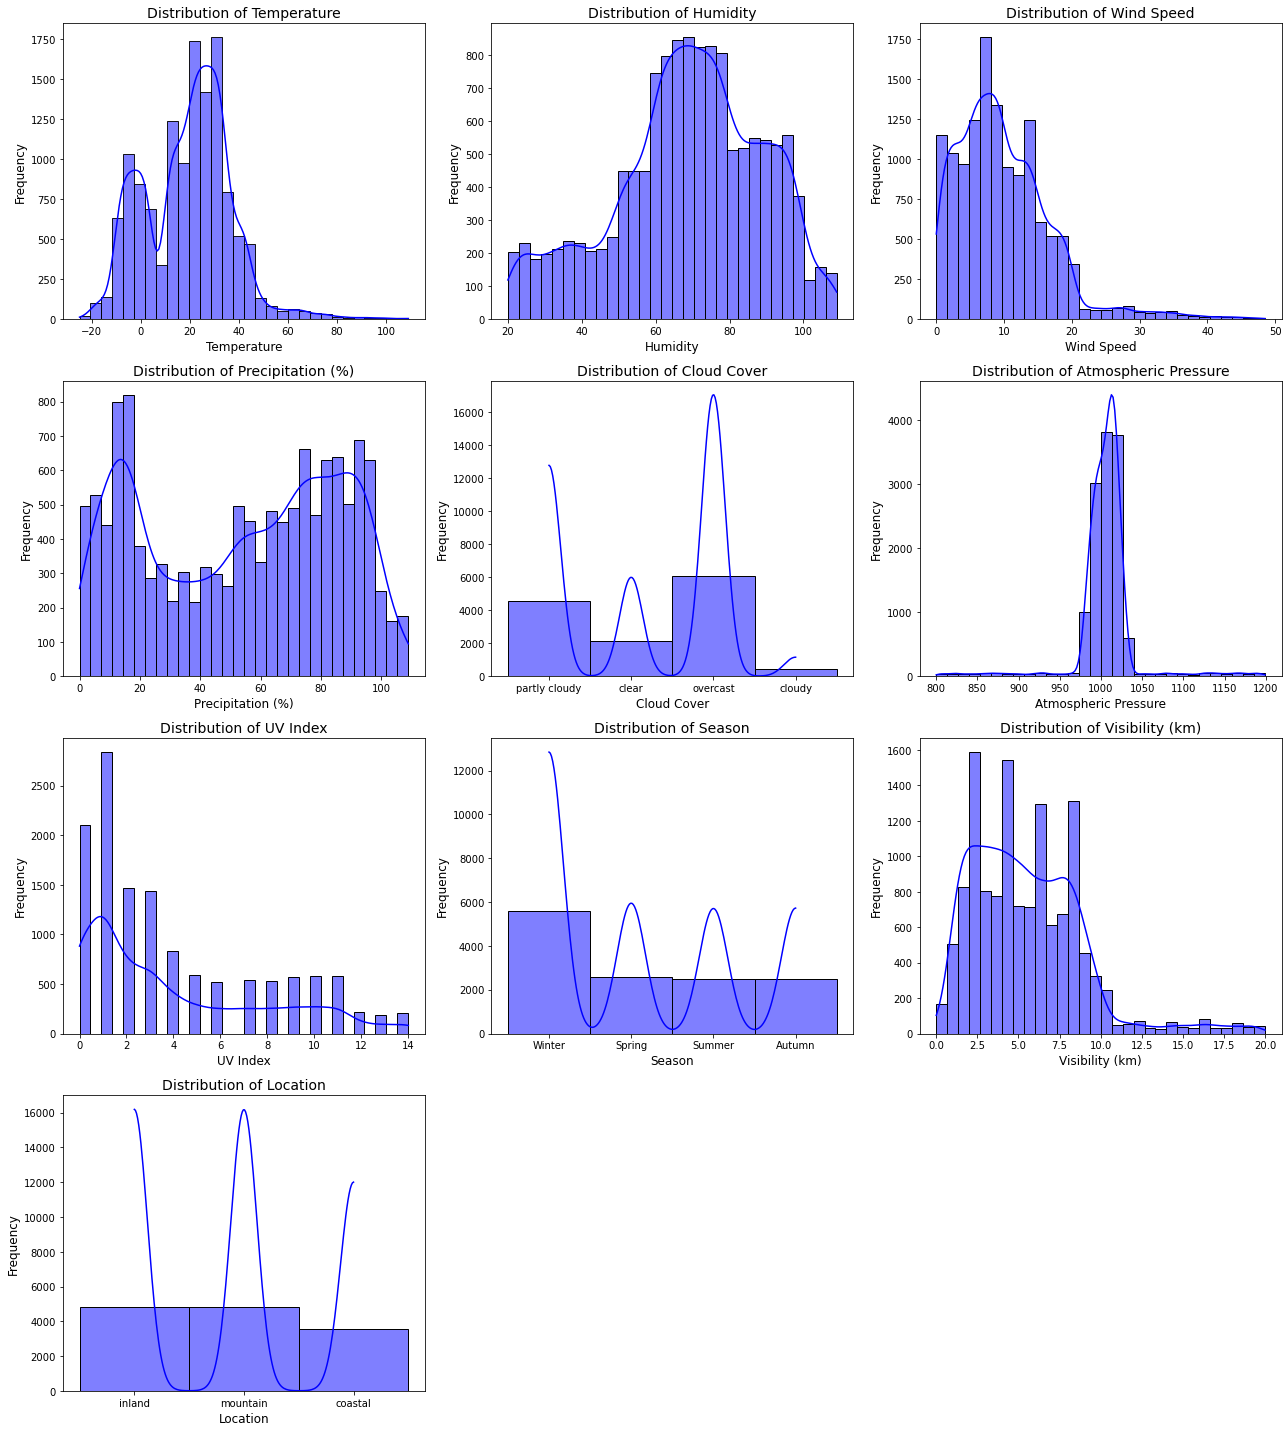

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.iloc[:, :-1]

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Measurement of Skewness

In [16]:
# Summary statistics for all numeric columns
print("Summary Statistics for Numeric Columns:")
print(df.describe())

# Check skewness for all numeric columns
from scipy.stats import skew

print("\nSkewness for All Numeric Columns:")
skewness = df.select_dtypes(include=['number']).apply(skew)
print(skewness)

Summary Statistics for Numeric Columns:
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800

## Checking for Outliers

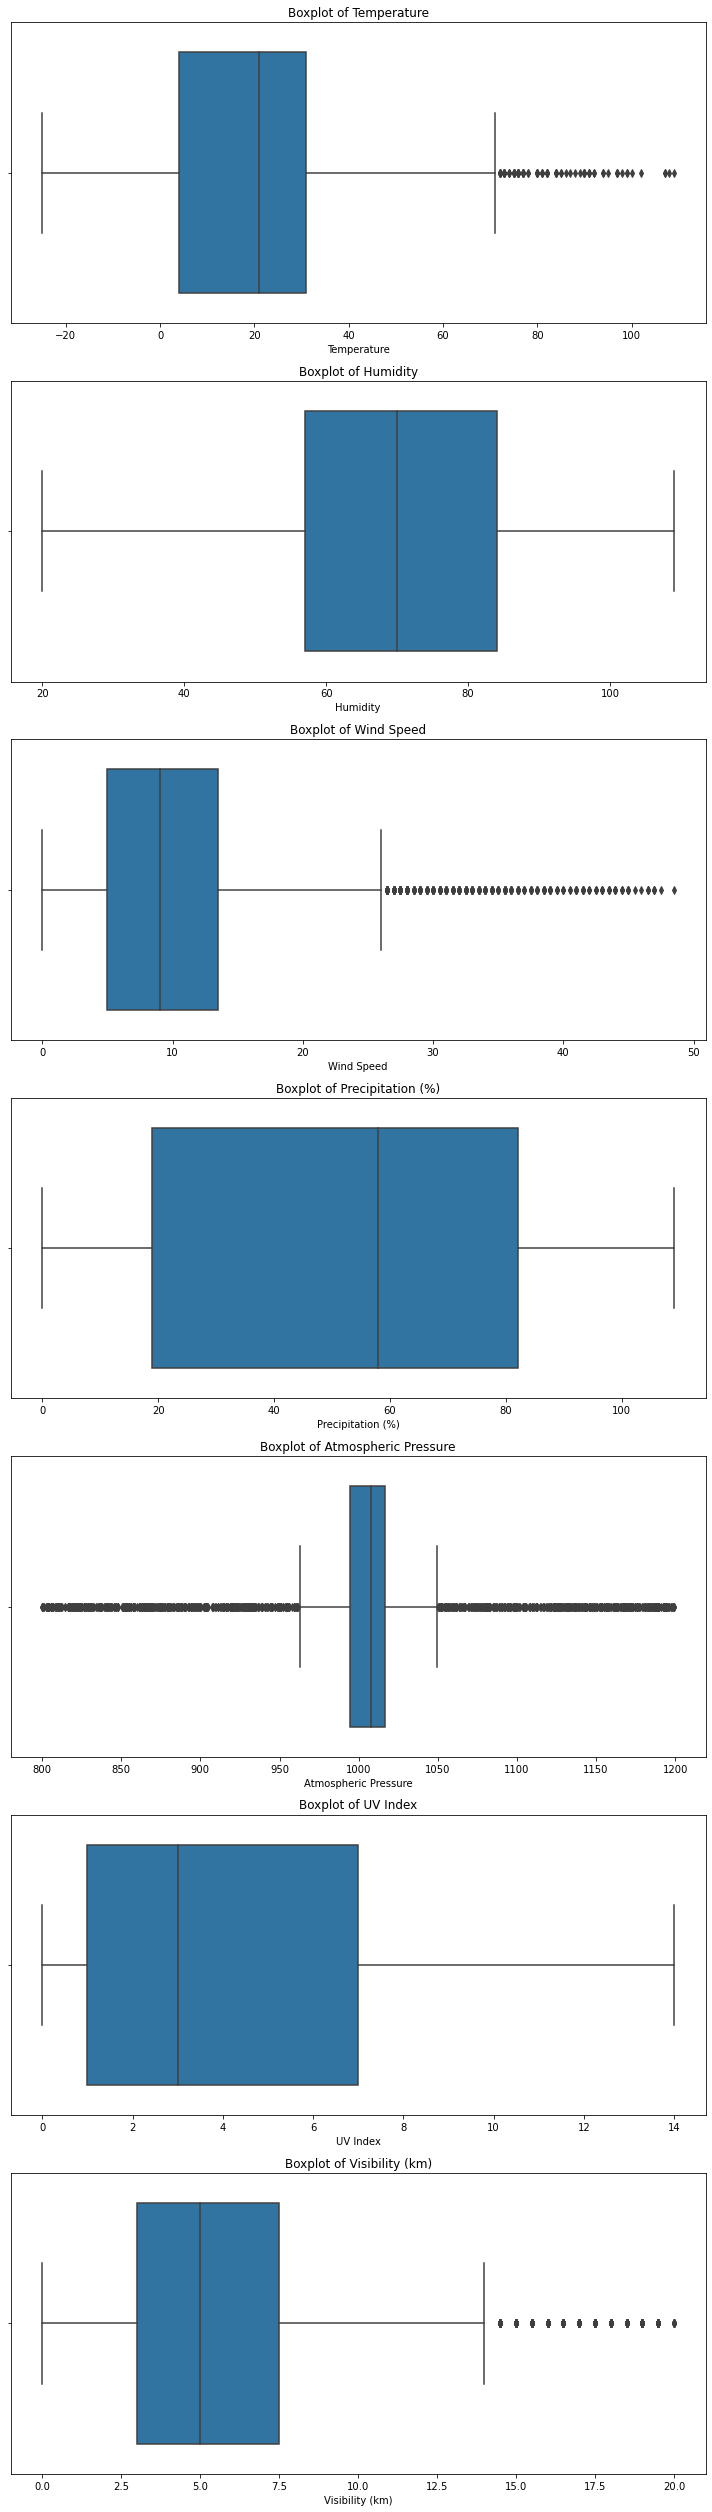

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate boxplots for all numeric columns
plt.figure(figsize=(10, len(numeric_columns) * 5))  
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Density Plot

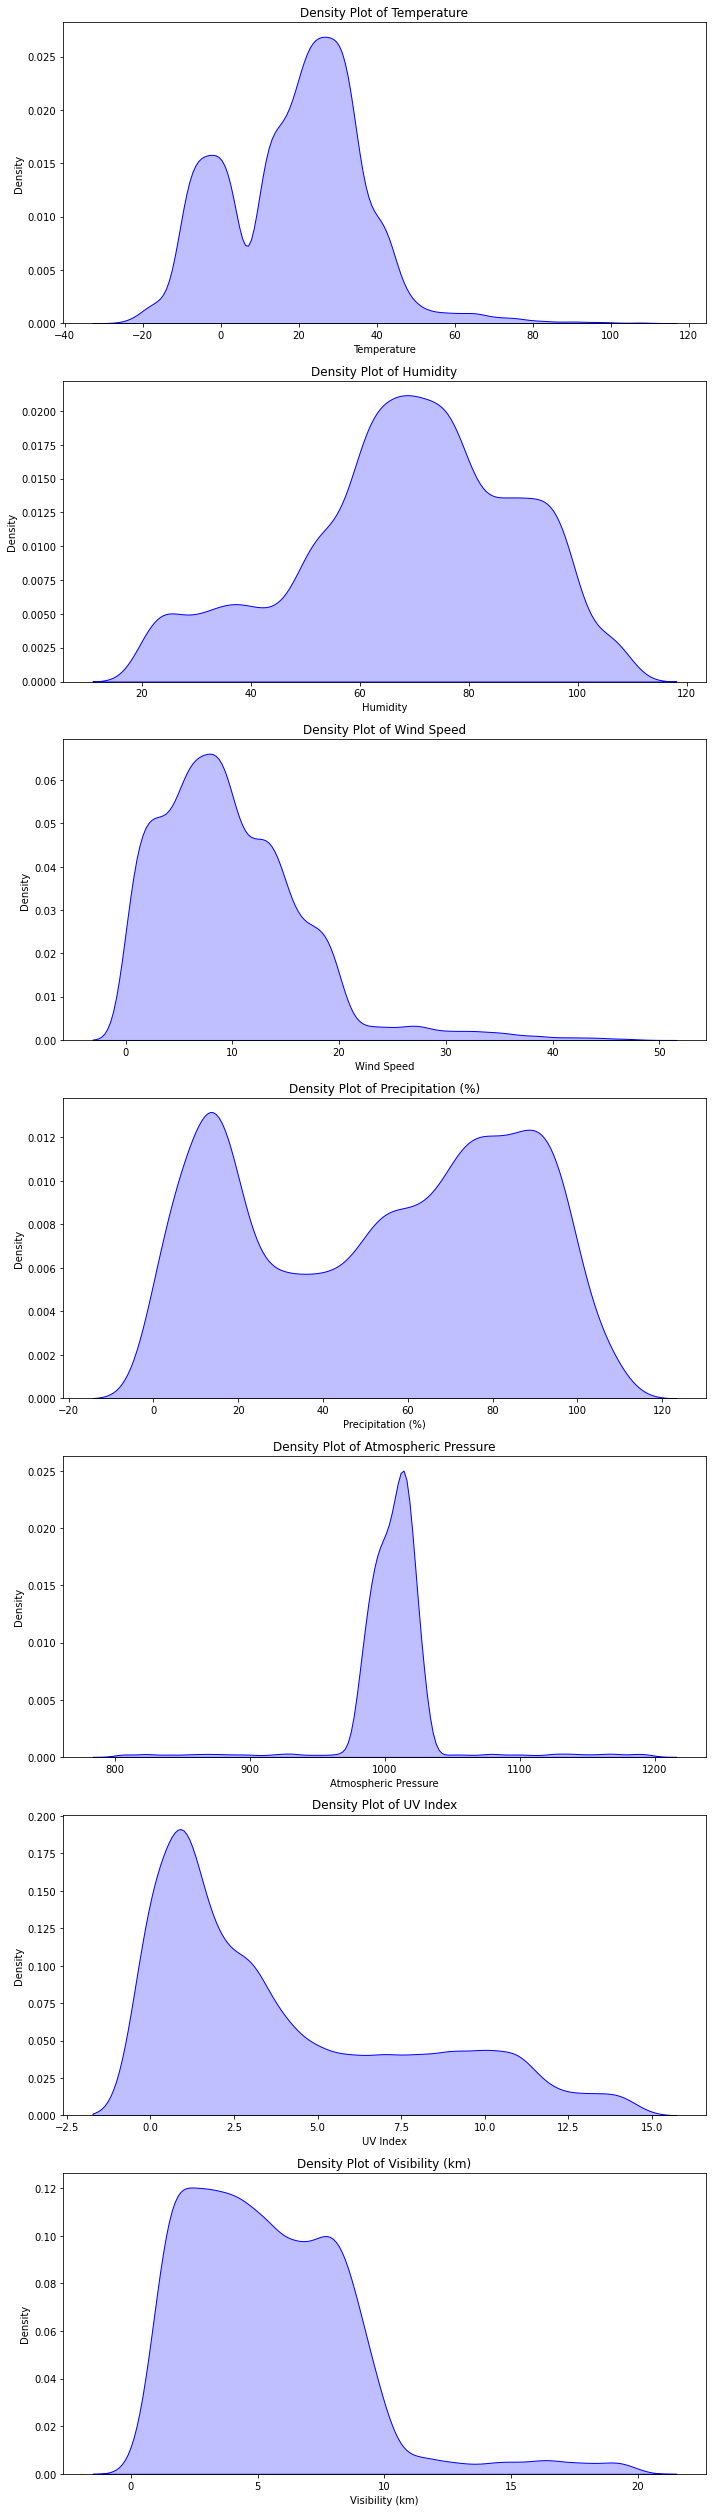

In [18]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate density plots for all numeric columns
plt.figure(figsize=(10, len(numeric_columns) * 5))  # Adjust figure size based on the number of columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.kdeplot(df[column], shade=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Handling Outliers using IQR

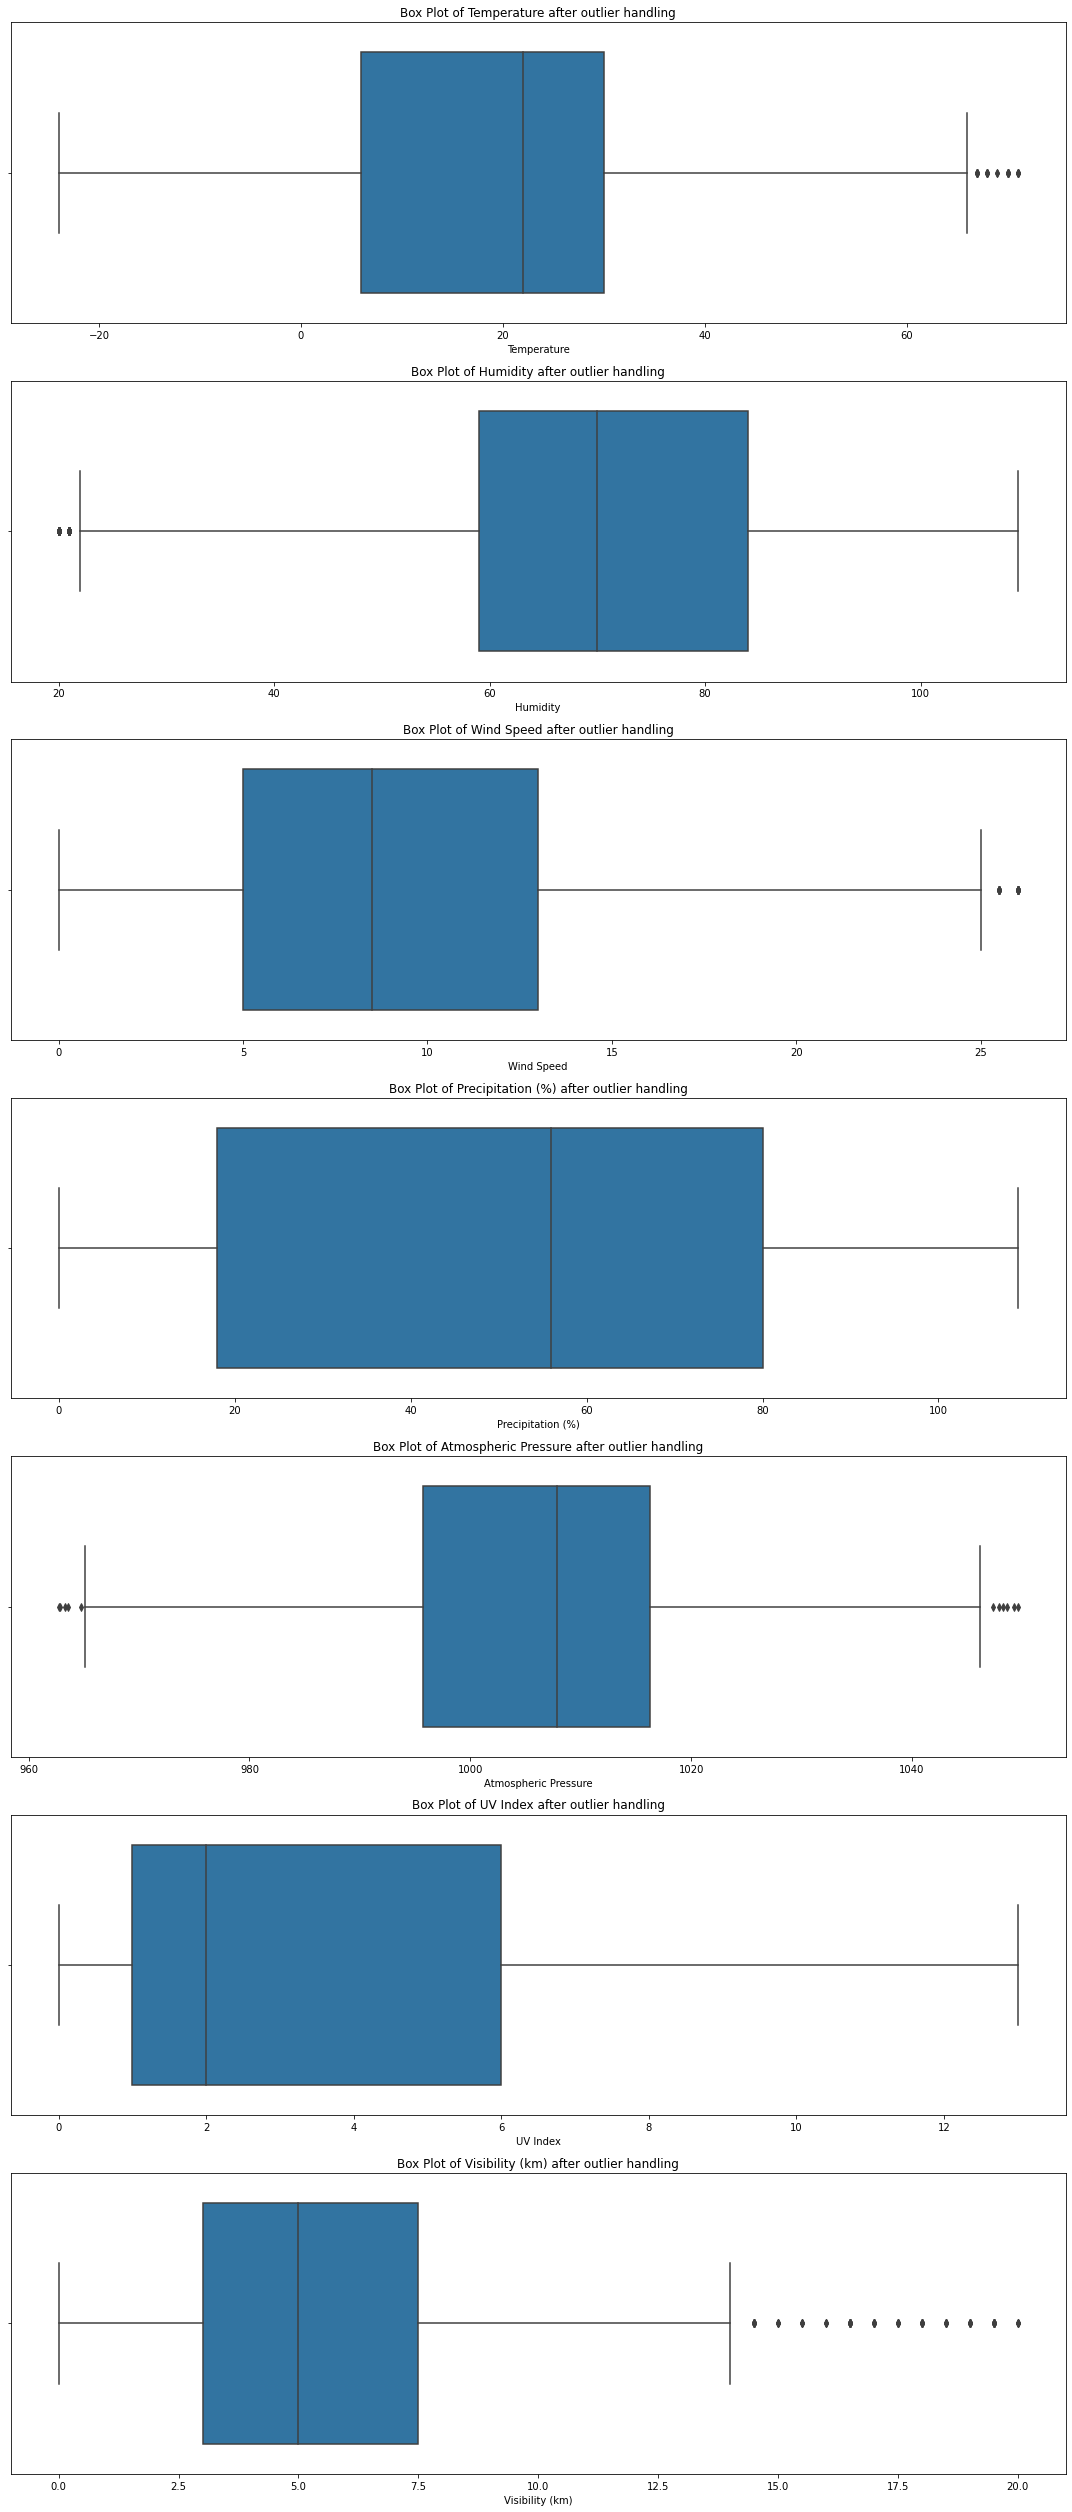

In [19]:
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to all numeric columns except the last column
numeric_columns = df.select_dtypes(include=['number']).columns[:-1]  # Exclude the last column
for column in numeric_columns:
    df = handle_outliers_iqr(df, column=column)

# Reset the index after removing outliers
df = df.reset_index(drop=True)

# Verify the changes for all numeric columns
plt.figure(figsize=(15, len(df.select_dtypes(include=['number']).columns) * 5))
for i, column in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['number']).columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} after outlier handling')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Boxplot for Cleaned Data after Handling Outliers

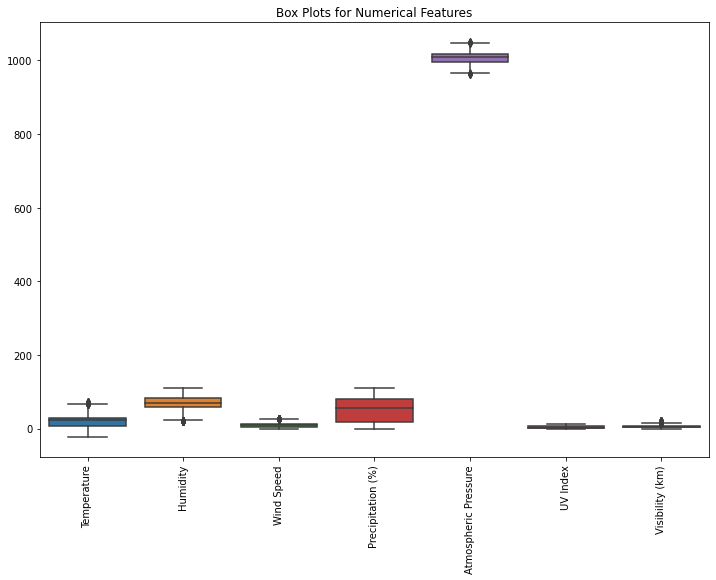

In [20]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Distribution of Cleaned Features

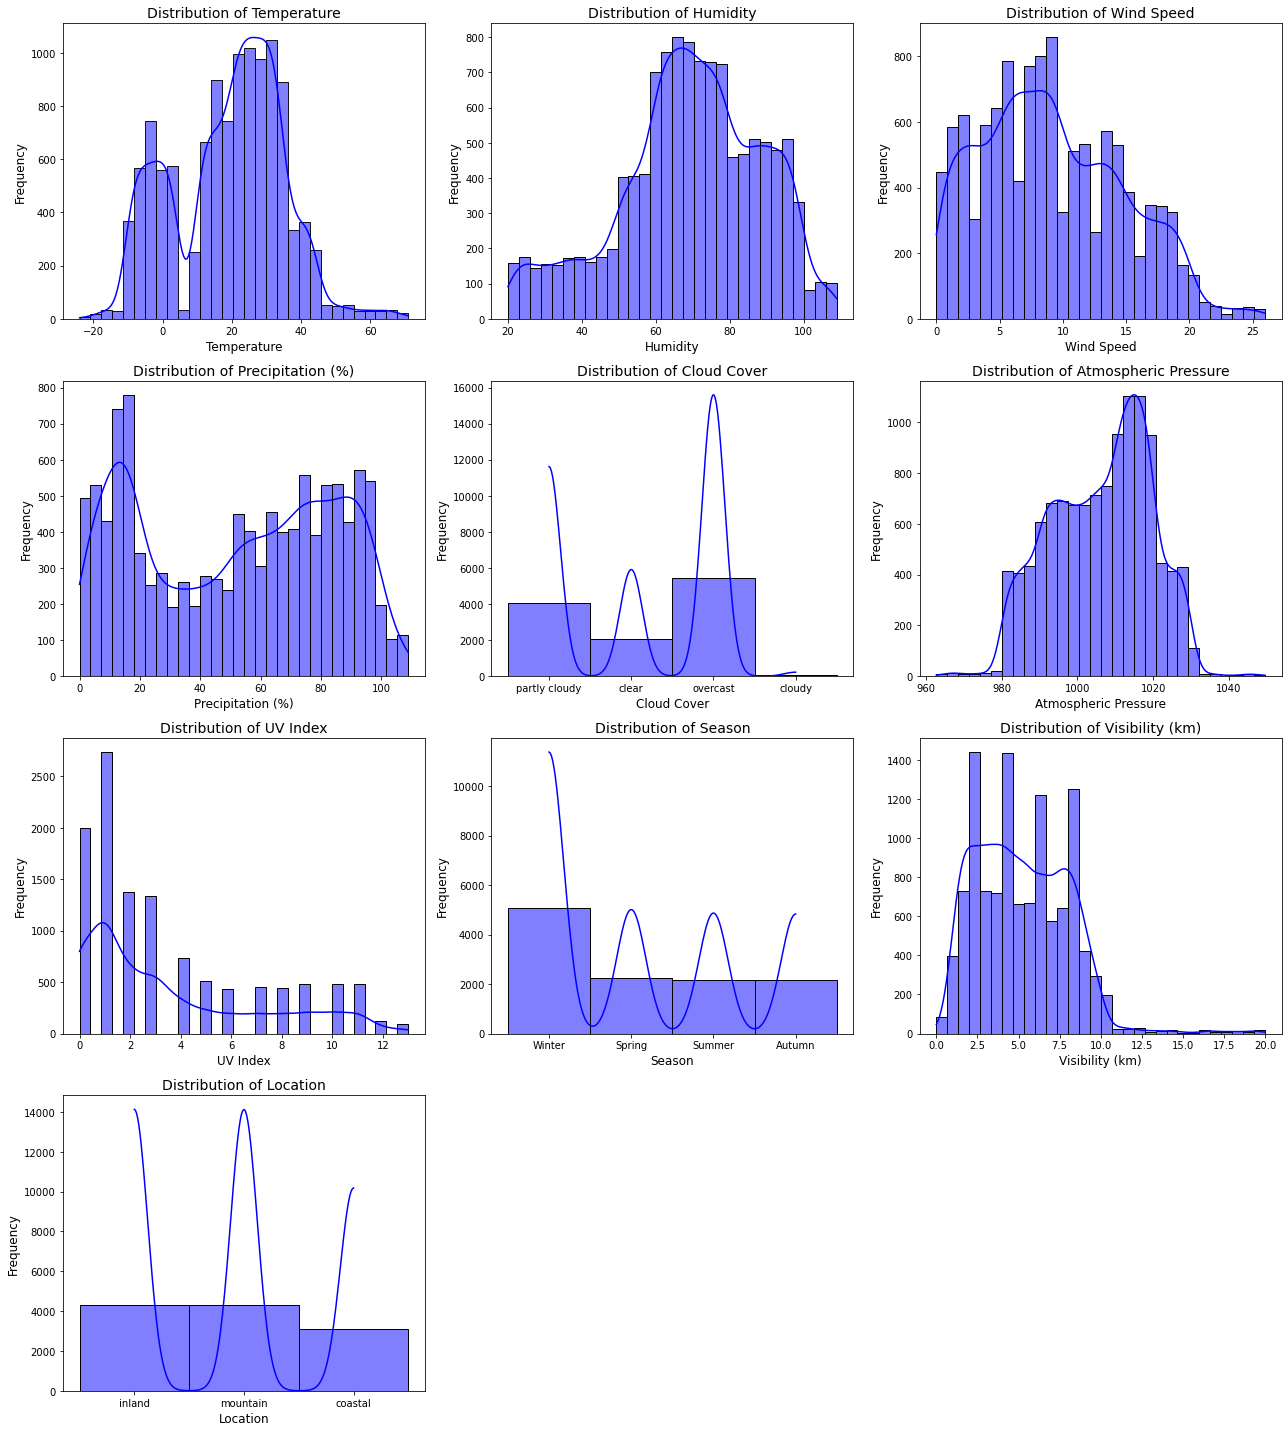

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.iloc[:, :-1]

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Display Final Cleaned Data 

In [22]:
# Get the last column 
last_column = df.iloc[:, -1]

# Count occurrences of each unique value in the last column
value_counts = last_column.value_counts()

#Display the value count
value_counts

Cloudy    2982
Sunny     2957
Snowy     2903
Rainy     2831
Name: Weather Type, dtype: int64

In [23]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
11668,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
11669,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
11670,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
11671,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# Categorical Data Encoding

In [24]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
11668,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
11669,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
11670,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
11671,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


## Label and One-Hot Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label Encoding for 'Cloud Cover'
cloud_cover_order = ['clear', 'cloudy', 'partly cloudy', 'overcast']
cloud_cover_encoder = LabelEncoder()
df['Cloud Cover Encoded'] = cloud_cover_encoder.fit_transform(df['Cloud Cover'])

# Label Encoding for 'Weather Type'
weather_type_encoder = LabelEncoder()
df['Weather Type Encoded'] = weather_type_encoder.fit_transform(df['Weather Type'])

# Label Encoding for 'Season'
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_encoder = LabelEncoder()
df['Season Encoded'] = season_encoder.fit_transform(df['Season'])

# One-Hot Encoding for 'Location'
one_hot_encoder = OneHotEncoder(sparse=False) 
location_encoded = one_hot_encoder.fit_transform(df[['Location']])
location_encoded_df = pd.DataFrame(location_encoded, columns=one_hot_encoder.get_feature_names_out(['Location']))
df = pd.concat([df, location_encoded_df], axis=1)

# Display the result
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Cloud Cover Encoded,Weather Type Encoded,Season Encoded,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,3,1,3,0.0,1.0,0.0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,3,0,1,0.0,1.0,0.0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,0,3,1,0.0,0.0,1.0
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,0,3,1,1.0,0.0,0.0
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,2,1,3,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy,2,0,1,1.0,0.0,0.0
11669,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,2,1,2,0.0,0.0,1.0
11670,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,2,0,0,1.0,0.0,0.0
11671,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,2,2,3,0.0,1.0,0.0


In [26]:
# Drop the original categorical columns
df.drop(columns=['Cloud Cover', 'Weather Type', 'Season', 'Location'], inplace=True)

In [27]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover Encoded,Weather Type Encoded,Season Encoded,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,3,1,3,0.0,1.0,0.0
1,39.0,96,8.5,71.0,1011.43,7,10.0,3,0,1,0.0,1.0,0.0
2,30.0,64,7.0,16.0,1018.72,5,5.5,0,3,1,0.0,0.0,1.0
3,38.0,83,1.5,82.0,1026.25,7,1.0,0,3,1,1.0,0.0,0.0
4,27.0,74,17.0,66.0,990.67,1,2.5,2,1,3,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,29.0,62,13.0,17.0,1002.81,2,5.0,2,0,1,1.0,0.0,0.0
11669,10.0,74,14.5,71.0,1003.15,1,1.0,2,1,2,0.0,0.0,1.0
11670,30.0,77,5.5,28.0,1012.69,3,9.0,2,0,0,1.0,0.0,0.0
11671,3.0,76,10.0,94.0,984.27,0,2.0,2,2,3,0.0,1.0,0.0


In [28]:
# Move the 'Season Encoded' column to the rightmost position using pop()
weather_encoded = df.pop('Weather Type Encoded')
df['Weather Type'] = weather_encoded  # Move it back at the rightmost position

# Display the result
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover Encoded,Season Encoded,Location_coastal,Location_inland,Location_mountain,Weather Type
0,14.0,73,9.5,82.0,1010.82,2,3.5,3,3,0.0,1.0,0.0,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,3,1,0.0,1.0,0.0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,0,1,0.0,0.0,1.0,3
3,38.0,83,1.5,82.0,1026.25,7,1.0,0,1,1.0,0.0,0.0,3
4,27.0,74,17.0,66.0,990.67,1,2.5,2,3,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,29.0,62,13.0,17.0,1002.81,2,5.0,2,1,1.0,0.0,0.0,0
11669,10.0,74,14.5,71.0,1003.15,1,1.0,2,2,0.0,0.0,1.0,1
11670,30.0,77,5.5,28.0,1012.69,3,9.0,2,0,1.0,0.0,0.0,0
11671,3.0,76,10.0,94.0,984.27,0,2.0,2,3,0.0,1.0,0.0,2


## Final Encoded Data

In [29]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover Encoded,Season Encoded,Location_coastal,Location_inland,Location_mountain,Weather Type
0,14.0,73,9.5,82.0,1010.82,2,3.5,3,3,0.0,1.0,0.0,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,3,1,0.0,1.0,0.0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,0,1,0.0,0.0,1.0,3
3,38.0,83,1.5,82.0,1026.25,7,1.0,0,1,1.0,0.0,0.0,3
4,27.0,74,17.0,66.0,990.67,1,2.5,2,3,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,29.0,62,13.0,17.0,1002.81,2,5.0,2,1,1.0,0.0,0.0,0
11669,10.0,74,14.5,71.0,1003.15,1,1.0,2,2,0.0,0.0,1.0,1
11670,30.0,77,5.5,28.0,1012.69,3,9.0,2,0,1.0,0.0,0.0,0
11671,3.0,76,10.0,94.0,984.27,0,2.0,2,3,0.0,1.0,0.0,2


## Review Encoded Data Types

In [30]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Atmospheric Pressure    float64
UV Index                  int64
Visibility (km)         float64
Cloud Cover Encoded       int32
Season Encoded            int32
Location_coastal        float64
Location_inland         float64
Location_mountain       float64
Weather Type              int32
dtype: object

In [31]:
# Convert all columns to numeric, setting errors='coerce' to handle non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')

# Verify the data types after conversion
print(df.dtypes)

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Atmospheric Pressure    float64
UV Index                  int64
Visibility (km)         float64
Cloud Cover Encoded       int32
Season Encoded            int32
Location_coastal        float64
Location_inland         float64
Location_mountain       float64
Weather Type              int32
dtype: object


# Correlation

## Correlation Matrix

In [32]:
df.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover Encoded,Season Encoded,Location_coastal,Location_inland,Location_mountain,Weather Type
Temperature,1.000000,-0.319286,-0.130146,-0.396233,0.670217,0.497406,0.416303,-0.250357,-0.440437,0.265140,-0.120621,-0.122045,0.030417
Humidity,-0.319286,1.000000,0.394899,0.697866,-0.446089,-0.426467,-0.511752,0.308560,0.191788,-0.103961,0.059955,0.035193,-0.286759
Wind Speed,-0.130146,0.394899,1.000000,0.450033,-0.247257,-0.216638,-0.337717,0.195336,0.056173,-0.008371,0.016916,-0.009255,-0.191495
Precipitation (%),-0.396233,0.697866,0.450033,1.000000,-0.543439,-0.438485,-0.594425,0.288669,0.238560,-0.125652,0.064268,0.050733,-0.176958
Atmospheric Pressure,0.670217,-0.446089,-0.247257,-0.543439,1.000000,0.526496,0.498671,-0.310973,-0.400214,0.224319,-0.112582,-0.092722,0.132997
UV Index,0.497406,-0.426467,-0.216638,-0.438485,0.526496,1.000000,0.454793,-0.420437,-0.232209,0.127112,-0.054294,-0.062044,0.429395
Visibility (km),0.416303,-0.511752,-0.337717,-0.594425,0.498671,0.454793,1.000000,-0.217859,-0.258638,0.129109,-0.069208,-0.048956,0.055911
Cloud Cover Encoded,-0.250357,0.308560,0.195336,0.288669,-0.310973,-0.420437,-0.217859,1.000000,0.082014,-0.038810,0.025598,0.009922,-0.566387
Season Encoded,-0.440437,0.191788,0.056173,0.238560,-0.400214,-0.232209,-0.258638,0.082014,1.000000,-0.193092,0.089745,0.086980,0.120395
Location_coastal,0.265140,-0.103961,-0.008371,-0.125652,0.224319,0.127112,0.129109,-0.038810,-0.193092,1.000000,-0.457660,-0.457576,-0.083908


## Correlation by Ranking

In [33]:
# Get the last column dynamically
target_column = df.iloc[:, -1]

# Compute the correlation of all columns with the last column
correlation_with_last_column = df.corrwith(target_column)

# Display the result
print(correlation_with_last_column)

Temperature             0.030417
Humidity               -0.286759
Wind Speed             -0.191495
Precipitation (%)      -0.176958
Atmospheric Pressure    0.132997
UV Index                0.429395
Visibility (km)         0.055911
Cloud Cover Encoded    -0.566387
Season Encoded          0.120395
Location_coastal       -0.083908
Location_inland         0.028888
Location_mountain       0.047907
Weather Type            1.000000
dtype: float64


## Correlation Heatmap

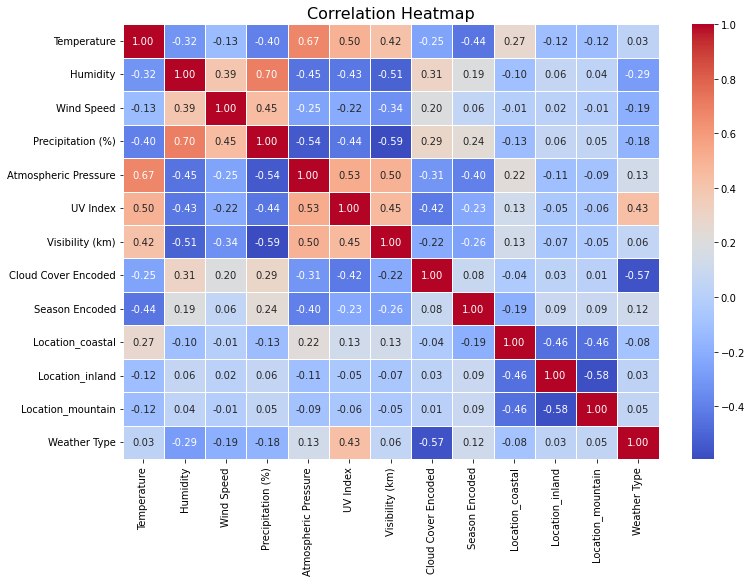

In [34]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Class 

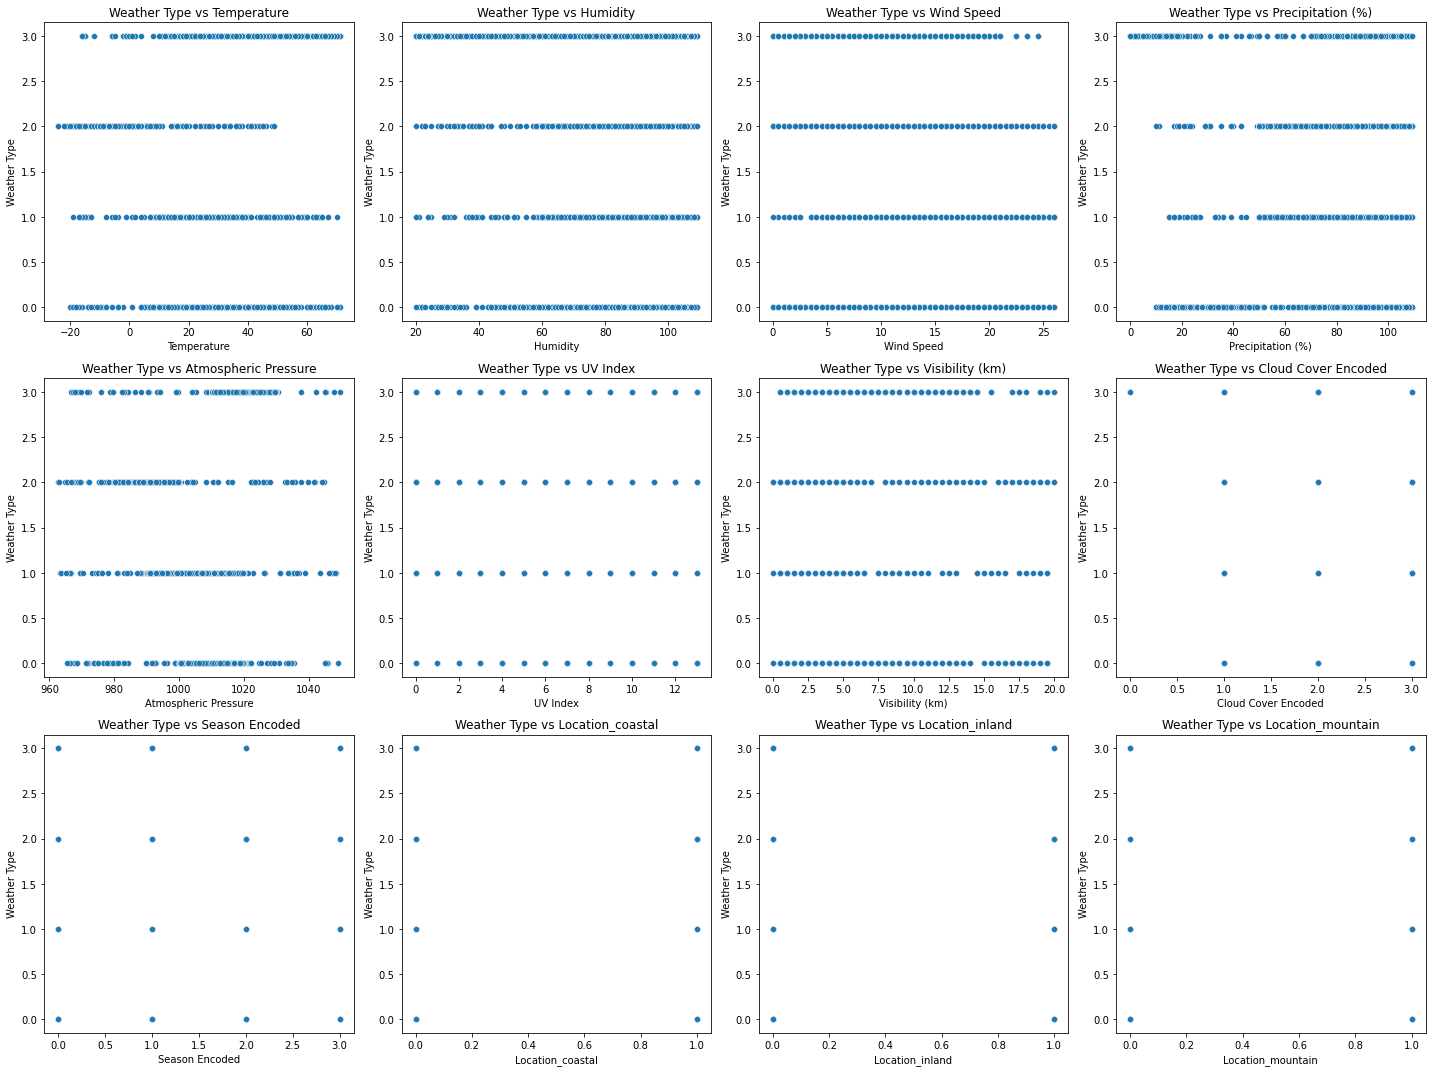

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot scatter plots for features vs target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    rows = (num_features // cols_per_row) + (1 if num_features % cols_per_row != 0 else 0)
    
    plt.figure(figsize=(cols_per_row * 5, rows * 5))
    
    # Iterate through each feature and plot it against the target
    for i, feature in enumerate(features):
        plt.subplot(rows, cols_per_row, i + 1)
        sns.scatterplot(x=df[feature], y=df[target])
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
    
    plt.tight_layout()
    plt.show()

# Get the feature columns dynamically (all columns except the last one)
features = df.columns[:-1]

# Get the target column dynamically (the last column)
target = df.columns[-1]

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)


# Relationship Between Attributes

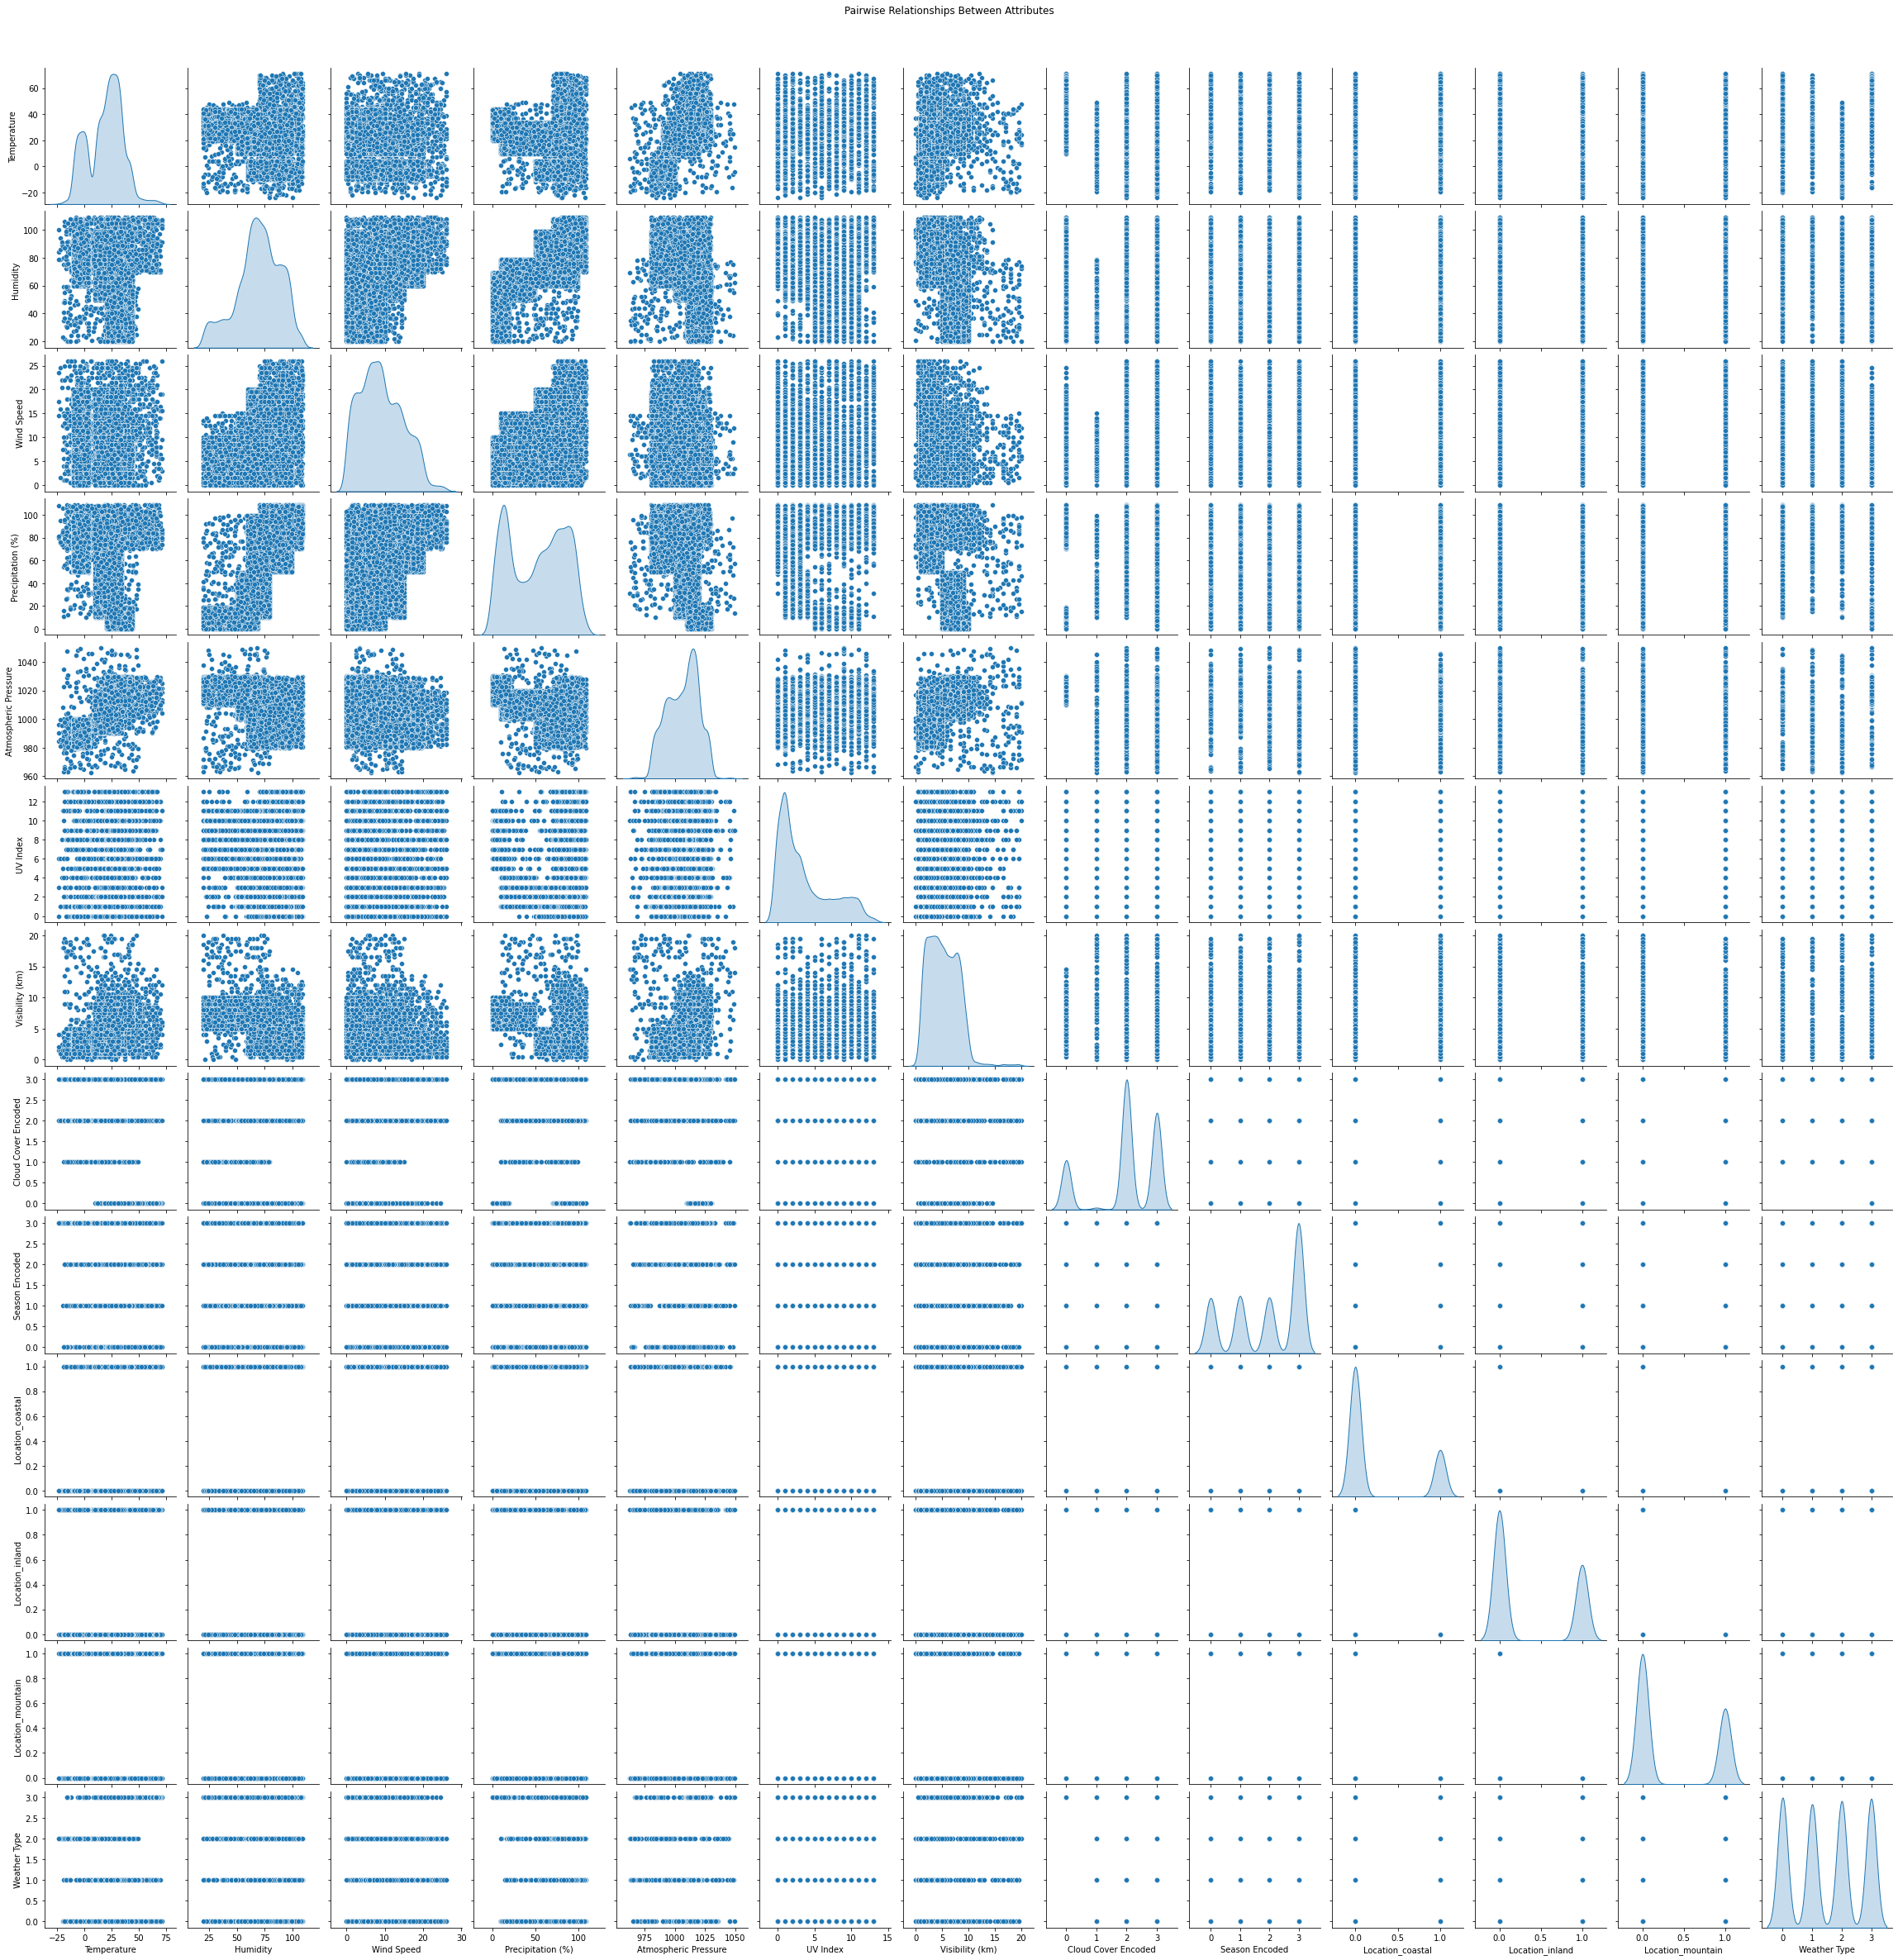

In [36]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

# Feature Importance

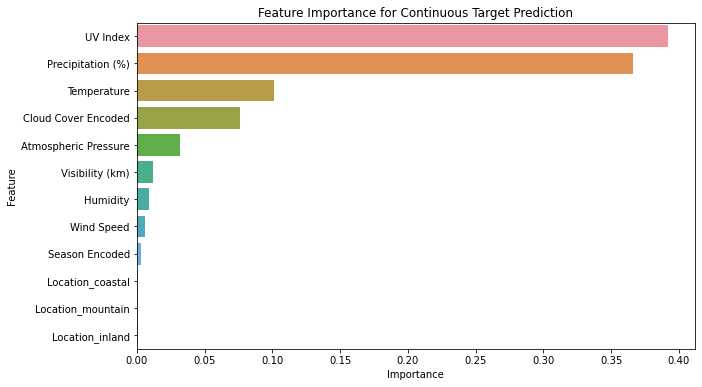

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df.drop(columns=[df.columns[-1]])  # Drop the last column (target)
y = df[df.columns[-1]]  # Select the last column (target

# Train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Continuous Target Prediction')
plt.show()

# Feature Selection RFE

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

# Create the model
model = LogisticRegression() 

# Create the RFE model and select the top 5 features 
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Print the features selected by RFE
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Print the ranking of all features
print(f"Feature Ranking: {rfe.ranking_}")

C:\Users\amiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Features: Index(['Visibility (km)', 'Cloud Cover Encoded', 'Season Encoded',
       'Location_coastal', 'Location_mountain'],
      dtype='object')
Feature Ranking: [4 7 5 6 8 3 1 1 1 1 2 1]


C:\Users\amiru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Retain only the selected features in the DataFrame
df_selected = df[selected_features]

# Optionally, you can add the target column ('Air Quality') back to df_selected
df_selected['Weather Type'] = y

df_selected

C:\Users\amiru\AppData\Local\Temp\ipykernel_11360\1537024520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Weather Type'] = y


,Visibility (km),Cloud Cover Encoded,Season Encoded,Location_coastal,Location_mountain,Weather Type
0,3.5,3,3,0.0,0.0,1
1,10.0,3,1,0.0,0.0,0
2,5.5,0,1,0.0,1.0,3
3,1.0,0,1,1.0,0.0,3
4,2.5,2,3,0.0,1.0,1
...,...,...,...,...,...,...
11668,5.0,2,1,1.0,0.0,0
11669,1.0,2,2,0.0,1.0,1
11670,9.0,2,0,1.0,0.0,0
11671,2.0,2,3,0.0,0.0,2


### We will evaluate the performance for both RFE filtered data and baseline data.

# Baseline Data

# Data Transformation

## Min-Max Scaler

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX[0:5, :])

[[0.4        0.59550562 0.36538462 0.75229358 0.55389222 0.15384615
  0.175      1.         1.         0.         1.         0.        ]
 [0.66315789 0.85393258 0.32692308 0.65137615 0.56091663 0.53846154
  0.5        1.         0.33333333 0.         1.         0.        ]
 [0.56842105 0.49438202 0.26923077 0.14678899 0.64486412 0.38461538
  0.275      0.         0.33333333 0.         0.         1.        ]
 [0.65263158 0.70786517 0.05769231 0.75229358 0.73157531 0.53846154
  0.05       0.         0.33333333 1.         0.         0.        ]
 [0.53684211 0.60674157 0.65384615 0.60550459 0.32185629 0.07692308
  0.125      0.66666667 1.         0.         0.         1.        ]]


In [41]:
# Verify total rows and columns are matched

# Print the dimensions of rescaledX
print("Total Rows in rescaledX:", rescaledX.shape[0])
print("Total Columns in rescaledX:", rescaledX.shape[1])

# Compare with the first 10 columns of df
df_subset = df.iloc[:, :11]  # Select the first 10 columns
print("Total Rows in df (first 10 columns):", df_subset.shape[0])
print("Total Columns in df (first 10 columns):", df_subset.shape[1])

# Check if the totals match
if rescaledX.shape == df_subset.shape:
    print("\nThe total rows and columns match!")
else:
    print("\nThe totals do not match.")

# Show rescaledX for further inspection (optional)
print("\nRescaled Input Features (first 5 rows):")
rescaledX

Total Rows in rescaledX: 11673
Total Columns in rescaledX: 12
Total Rows in df (first 10 columns): 11673
Total Columns in df (first 10 columns): 11

The totals do not match.

Rescaled Input Features (first 5 rows):


array([[0.4       , 0.59550562, 0.36538462, ..., 0.        , 1.        ,
        0.        ],
       [0.66315789, 0.85393258, 0.32692308, ..., 0.        , 1.        ,
        0.        ],
       [0.56842105, 0.49438202, 0.26923077, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.56842105, 0.64044944, 0.21153846, ..., 1.        , 0.        ,
        0.        ],
       [0.28421053, 0.62921348, 0.38461538, ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.20224719, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [42]:
Y

array([1., 0., 3., ..., 0., 2., 1.])

# Splitting to Train and Test Data

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

array = df.values

# Extract X (features) and y (target)
X = rescaledX
y = Y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Checking for Total Training and Test Data After Splitting

In [44]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 8171
Total test data of X: 3502

Total training data of Y: 8171
Total test data of Y: 3502


##  Checking for Data Imbalance in Training Data

In [45]:
# Convert y_train to pandas Series if it is a NumPy array
y_train_series = pd.Series(y_train)

# Calculate the class distribution in the training data
class_dist_train = y_train_series.value_counts()
print("Class distribution in training data:")
print(class_dist_train)
print()

# Calculate the percentage for each class in the training data
total_samples_train = class_dist_train.sum()
percentages_train = (class_dist_train / total_samples_train) * 100
print("Class Percentages in Training Data:")
print(percentages_train)

Class distribution in training data:
0.0    2087
3.0    2055
2.0    2051
1.0    1978
dtype: int64

Class Percentages in Training Data:
0.0    25.541549
3.0    25.149920
2.0    25.100967
1.0    24.207563
dtype: float64


# SMOTE Oversampling for Minority Class

In [46]:
from imblearn.over_sampling import SMOTE

# Convert y_train to a pandas Series for easier manipulation
y_train = pd.Series(y_train)

print('Before Oversampling:')
print(y_train.value_counts())

# Apply SMOTE for oversampling only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert y_train_smote back to a pandas Series to use value_counts()
y_train_smote = pd.Series(y_train_smote)

print('After Oversampling:')
print(y_train_smote.value_counts())

Before Oversampling:
0.0    2087
3.0    2055
2.0    2051
1.0    1978
dtype: int64
After Oversampling:
0.0    2087
1.0    2087
2.0    2087
3.0    2087
dtype: int64


# Train, Test and Evaluate Models


Logistic Regression: Accuracy: 0.911

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       895
         1.0       0.88      0.91      0.90       853
         2.0       0.94      0.98      0.96       852
         3.0       0.94      0.88      0.91       902

    accuracy                           0.91      3502
   macro avg       0.91      0.91      0.91      3502
weighted avg       0.91      0.91      0.91      3502




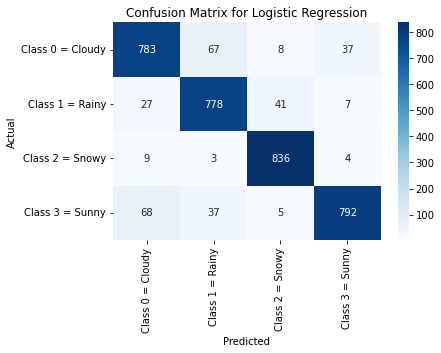



KNN: Accuracy: 0.948

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       895
         1.0       0.92      0.94      0.93       853
         2.0       0.97      0.98      0.98       852
         3.0       0.98      0.95      0.97       902

    accuracy                           0.95      3502
   macro avg       0.95      0.95      0.95      3502
weighted avg       0.95      0.95      0.95      3502




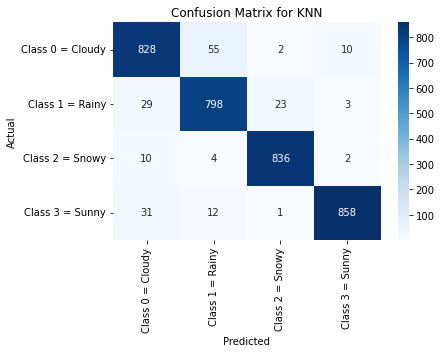



Decision Tree: Accuracy: 0.965

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       895
         1.0       0.96      0.96      0.96       853
         2.0       0.99      0.98      0.98       852
         3.0       0.97      0.97      0.97       902

    accuracy                           0.96      3502
   macro avg       0.97      0.96      0.97      3502
weighted avg       0.97      0.96      0.96      3502




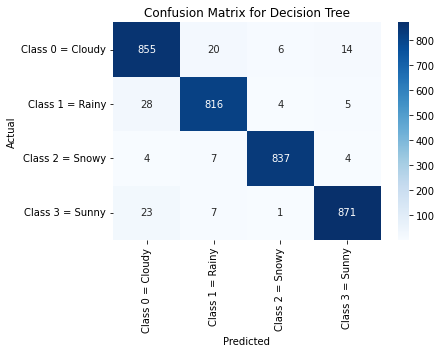



Naive Bayes: Accuracy: 0.941

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       895
         1.0       0.90      0.94      0.92       853
         2.0       0.96      0.98      0.97       852
         3.0       0.95      0.95      0.95       902

    accuracy                           0.94      3502
   macro avg       0.94      0.94      0.94      3502
weighted avg       0.94      0.94      0.94      3502




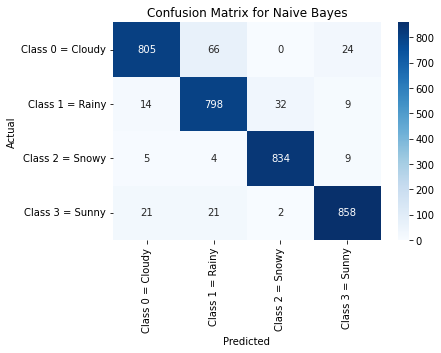



Support Vector Machine: Accuracy: 0.957

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       895
         1.0       0.93      0.96      0.94       853
         2.0       0.98      0.98      0.98       852
         3.0       0.99      0.95      0.97       902

    accuracy                           0.96      3502
   macro avg       0.96      0.96      0.96      3502
weighted avg       0.96      0.96      0.96      3502




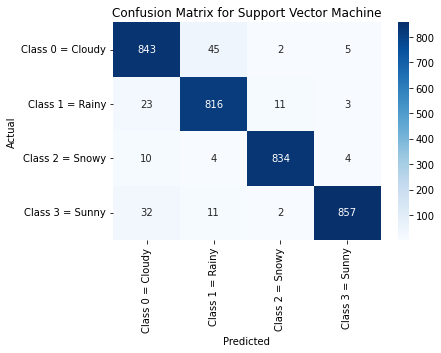



GBM: Accuracy: 0.969

Classification Report for GBM:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       895
         1.0       0.95      0.97      0.96       853
         2.0       0.99      0.98      0.99       852
         3.0       0.99      0.97      0.98       902

    accuracy                           0.97      3502
   macro avg       0.97      0.97      0.97      3502
weighted avg       0.97      0.97      0.97      3502




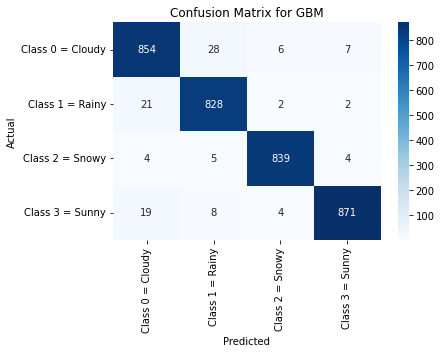



XGBoost: Accuracy: 0.970

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       895
         1.0       0.96      0.97      0.96       853
         2.0       0.99      0.99      0.99       852
         3.0       0.98      0.97      0.98       902

    accuracy                           0.97      3502
   macro avg       0.97      0.97      0.97      3502
weighted avg       0.97      0.97      0.97      3502




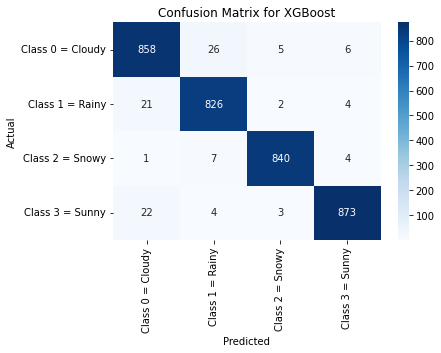



MLP: Accuracy: 0.964

Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       895
         1.0       0.94      0.96      0.95       853
         2.0       0.98      0.98      0.98       852
         3.0       0.98      0.96      0.97       902

    accuracy                           0.96      3502
   macro avg       0.96      0.96      0.96      3502
weighted avg       0.96      0.96      0.96      3502




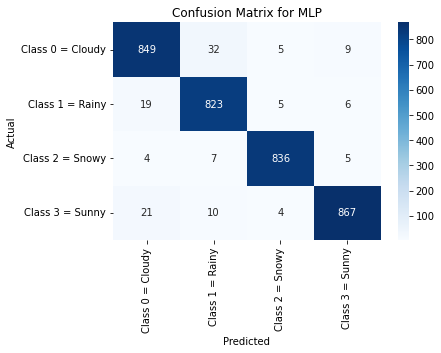



Algorithm Comparison:



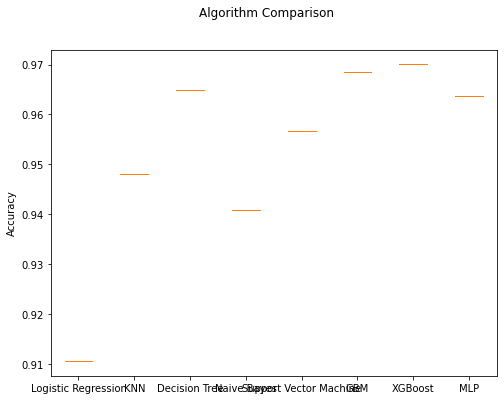

In [47]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Prepare models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = model.score(X_test, y_test)
    results.append([accuracy])
    names.append(name)
    print()
    print(f"{name}: Accuracy: {accuracy:.3f}")
    print()

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0 = Cloudy', 'Class 1 = Rainy','Class 2 = Snowy', 'Class 3 = Sunny'], yticklabels=['Class 0 = Cloudy', 'Class 1 = Rainy','Class 2 = Snowy', 'Class 3 = Sunny'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()

# Boxplot for algorithm comparison
print()
print("Algorithm Comparison:")
print()
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.show()

# Prediction Table Output

In [48]:
# Dictionary to store predictions for each model
test_predictions = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    test_predictions[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual Value'] = y_test

# Reorder the columns to put the 'Actual Value' in the first column
predictions_df = predictions_df[['Actual Value'] + [col for col in predictions_df.columns if col != 'Actual Value']]

# Mapping to rename class labels
label_mapping = {0: 'cloudy', 1: 'rainy', 2: 'snowy', 3: 'sunny'}

# Rename the values in the DataFrame using the mapping
predictions_df = predictions_df.replace(label_mapping)

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df

Table of Predictions:


,Actual Value,Logistic Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,GBM,XGBoost,MLP
0,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny
1,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy
2,rainy,rainy,rainy,rainy,rainy,rainy,rainy,rainy,rainy
3,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny
4,sunny,rainy,sunny,sunny,sunny,sunny,sunny,sunny,sunny
...,...,...,...,...,...,...,...,...,...
3497,snowy,snowy,snowy,snowy,snowy,snowy,snowy,snowy,snowy
3498,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny
3499,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy
3500,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy


# RFE Filtered Data

In [49]:
df_selected

,Visibility (km),Cloud Cover Encoded,Season Encoded,Location_coastal,Location_mountain,Weather Type
0,3.5,3,3,0.0,0.0,1
1,10.0,3,1,0.0,0.0,0
2,5.5,0,1,0.0,1.0,3
3,1.0,0,1,1.0,0.0,3
4,2.5,2,3,0.0,1.0,1
...,...,...,...,...,...,...
11668,5.0,2,1,1.0,0.0,0
11669,1.0,2,2,0.0,1.0,1
11670,9.0,2,0,1.0,0.0,0
11671,2.0,2,3,0.0,0.0,2


## Min-Max Scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df_selected.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX[0:5, :])

[[0.175      1.         1.         0.         0.        ]
 [0.5        1.         0.33333333 0.         0.        ]
 [0.275      0.         0.33333333 0.         1.        ]
 [0.05       0.         0.33333333 1.         0.        ]
 [0.125      0.66666667 1.         0.         1.        ]]


In [51]:
# Verify total rows and columns are matched

# Print the dimensions of rescaledX
print("Total Rows in rescaledX:", rescaledX.shape[0])
print("Total Columns in rescaledX:", rescaledX.shape[1])

# Compare with the first 10 columns of df
df_subset = df_selected.iloc[:, :11]  # Select the first 10 columns
print("Total Rows in df (first 10 columns):", df_subset.shape[0])
print("Total Columns in df (first 10 columns):", df_subset.shape[1])

# Check if the totals match
if rescaledX.shape == df_subset.shape:
    print("\nThe total rows and columns match!")
else:
    print("\nThe totals do not match.")

# Show rescaledX for further inspection (optional)
print("\nRescaled Input Features (first 5 rows):")
rescaledX

Total Rows in rescaledX: 11673
Total Columns in rescaledX: 5
Total Rows in df (first 10 columns): 11673
Total Columns in df (first 10 columns): 6

The totals do not match.

Rescaled Input Features (first 5 rows):


array([[0.175     , 1.        , 1.        , 0.        , 0.        ],
       [0.5       , 1.        , 0.33333333, 0.        , 0.        ],
       [0.275     , 0.        , 0.33333333, 0.        , 1.        ],
       ...,
       [0.45      , 0.66666667, 0.        , 1.        , 0.        ],
       [0.1       , 0.66666667, 1.        , 0.        , 0.        ],
       [0.5       , 0.66666667, 0.        , 0.        , 1.        ]])

In [52]:
Y

array([1., 0., 3., ..., 0., 2., 1.])

# Splitting to Train and Test Data

In [53]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 8171
Total test data of X: 3502

Total training data of Y: 8171
Total test data of Y: 3502


##  Checking for Data Imbalance in Training Data

In [54]:
# Convert y_train to pandas Series if it is a NumPy array
y_train_series = pd.Series(y_train)

# Calculate the class distribution in the training data
class_dist_train = y_train_series.value_counts()
print("Class distribution in training data:")
print(class_dist_train)
print()

# Calculate the percentage for each class in the training data
total_samples_train = class_dist_train.sum()
percentages_train = (class_dist_train / total_samples_train) * 100
print("Class Percentages in Training Data:")
print(percentages_train)

Class distribution in training data:
0.0    2087
3.0    2055
2.0    2051
1.0    1978
dtype: int64

Class Percentages in Training Data:
0.0    25.541549
3.0    25.149920
2.0    25.100967
1.0    24.207563
dtype: float64


# SMOTE Oversampling for Minority Class

In [55]:
from imblearn.over_sampling import SMOTE

# Convert y_train to a pandas Series for easier manipulation
y_train = pd.Series(y_train)

print('Before Oversampling:')
print(y_train.value_counts())

# Apply SMOTE for oversampling only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert y_train_smote back to a pandas Series to use value_counts()
y_train_smote = pd.Series(y_train_smote)

print('After Oversampling:')
print(y_train_smote.value_counts())

Before Oversampling:
0.0    2087
3.0    2055
2.0    2051
1.0    1978
dtype: int64
After Oversampling:
0.0    2087
1.0    2087
2.0    2087
3.0    2087
dtype: int64


# Train, Test and Evaluate Models


Logistic Regression: Accuracy: 0.911

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       895
         1.0       0.88      0.91      0.90       853
         2.0       0.94      0.98      0.96       852
         3.0       0.94      0.88      0.91       902

    accuracy                           0.91      3502
   macro avg       0.91      0.91      0.91      3502
weighted avg       0.91      0.91      0.91      3502




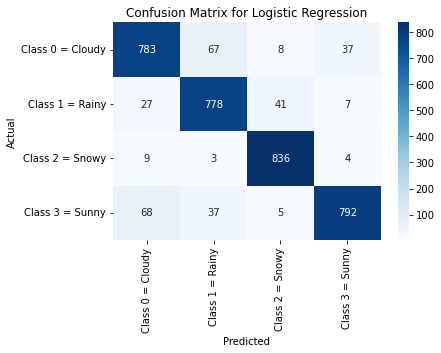



KNN: Accuracy: 0.948

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       895
         1.0       0.92      0.94      0.93       853
         2.0       0.97      0.98      0.98       852
         3.0       0.98      0.95      0.97       902

    accuracy                           0.95      3502
   macro avg       0.95      0.95      0.95      3502
weighted avg       0.95      0.95      0.95      3502




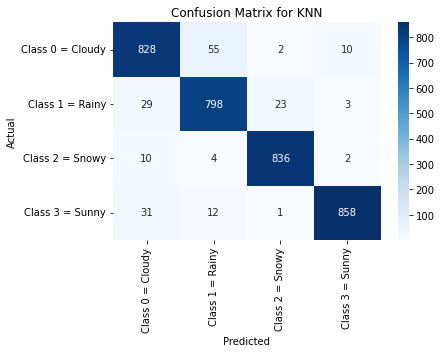



Decision Tree: Accuracy: 0.962

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       895
         1.0       0.96      0.95      0.96       853
         2.0       0.99      0.98      0.98       852
         3.0       0.97      0.96      0.97       902

    accuracy                           0.96      3502
   macro avg       0.96      0.96      0.96      3502
weighted avg       0.96      0.96      0.96      3502




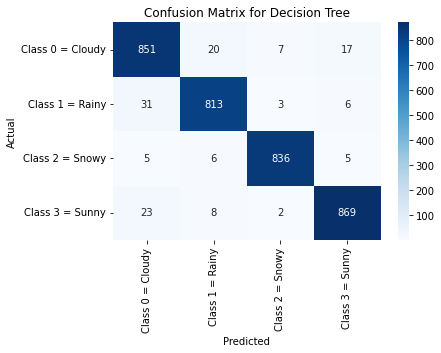



Naive Bayes: Accuracy: 0.941

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       895
         1.0       0.90      0.94      0.92       853
         2.0       0.96      0.98      0.97       852
         3.0       0.95      0.95      0.95       902

    accuracy                           0.94      3502
   macro avg       0.94      0.94      0.94      3502
weighted avg       0.94      0.94      0.94      3502




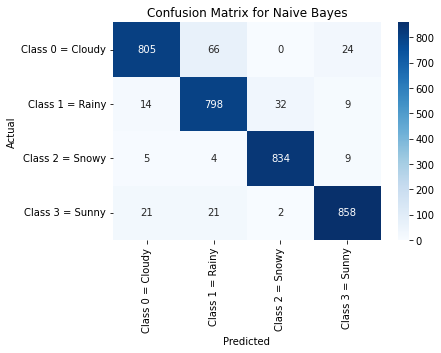



Support Vector Machine: Accuracy: 0.957

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       895
         1.0       0.93      0.96      0.94       853
         2.0       0.98      0.98      0.98       852
         3.0       0.99      0.95      0.97       902

    accuracy                           0.96      3502
   macro avg       0.96      0.96      0.96      3502
weighted avg       0.96      0.96      0.96      3502




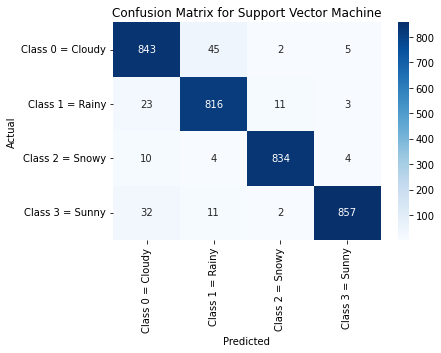



GBM: Accuracy: 0.969

Classification Report for GBM:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       895
         1.0       0.95      0.97      0.96       853
         2.0       0.99      0.98      0.99       852
         3.0       0.99      0.97      0.98       902

    accuracy                           0.97      3502
   macro avg       0.97      0.97      0.97      3502
weighted avg       0.97      0.97      0.97      3502




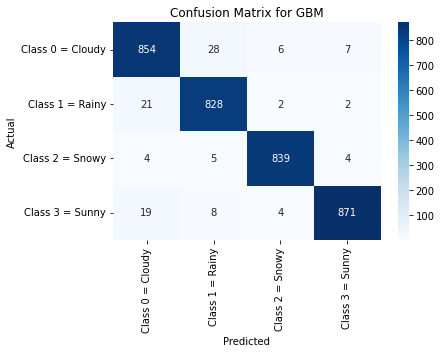



XGBoost: Accuracy: 0.970

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       895
         1.0       0.96      0.97      0.96       853
         2.0       0.99      0.99      0.99       852
         3.0       0.98      0.97      0.98       902

    accuracy                           0.97      3502
   macro avg       0.97      0.97      0.97      3502
weighted avg       0.97      0.97      0.97      3502




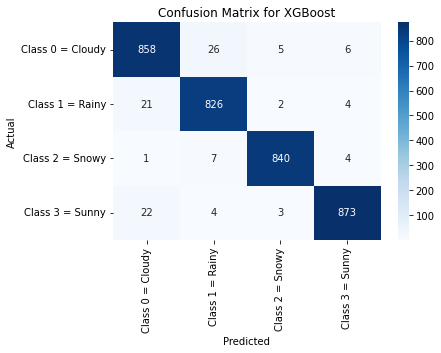



MLP: Accuracy: 0.963

Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       895
         1.0       0.95      0.96      0.96       853
         2.0       0.98      0.98      0.98       852
         3.0       0.98      0.96      0.97       902

    accuracy                           0.96      3502
   macro avg       0.96      0.96      0.96      3502
weighted avg       0.96      0.96      0.96      3502




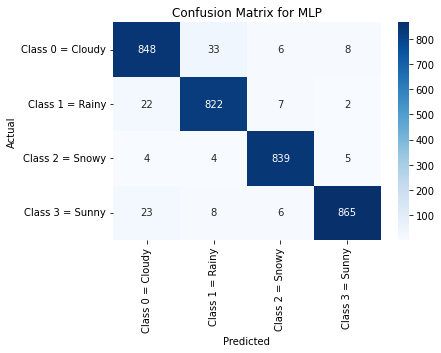



Algorithm Comparison:



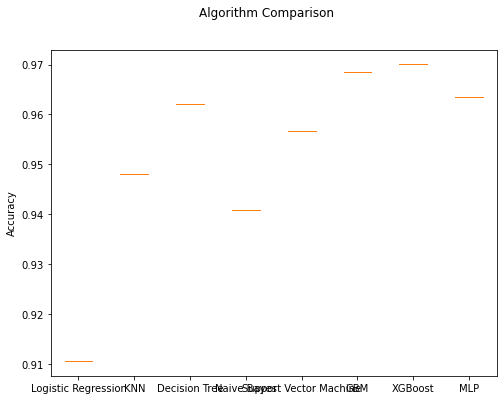

In [56]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Prepare models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = model.score(X_test, y_test)
    results.append([accuracy])
    names.append(name)
    print()
    print(f"{name}: Accuracy: {accuracy:.3f}")
    print()

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0 = Cloudy', 'Class 1 = Rainy','Class 2 = Snowy', 'Class 3 = Sunny'], yticklabels=['Class 0 = Cloudy', 'Class 1 = Rainy','Class 2 = Snowy', 'Class 3 = Sunny'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()

# Boxplot for algorithm comparison
print()
print("Algorithm Comparison:")
print()
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.show()

# Prediction Table Output

In [57]:
# Dictionary to store predictions for each model
test_predictions = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    test_predictions[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual Value'] = y_test

# Reorder the columns to put the 'Actual Value' in the first column
predictions_df = predictions_df[['Actual Value'] + [col for col in predictions_df.columns if col != 'Actual Value']]

# Mapping to rename class labels
label_mapping = {0: 'cloudy', 1: 'rainy', 2: 'snowy', 3: 'sunny'}

# Rename the values in the DataFrame using the mapping
predictions_df = predictions_df.replace(label_mapping)

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df

Table of Predictions:


,Actual Value,Logistic Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,GBM,XGBoost,MLP
0,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny
1,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy
2,rainy,rainy,rainy,rainy,rainy,rainy,rainy,rainy,rainy
3,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny
4,sunny,rainy,sunny,sunny,sunny,sunny,sunny,sunny,sunny
...,...,...,...,...,...,...,...,...,...
3497,snowy,snowy,snowy,snowy,snowy,snowy,snowy,snowy,snowy
3498,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny,sunny
3499,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy
3500,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy,cloudy
